## V61 HeNe-Laser


In [1]:
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
from scipy.signal import find_peaks as peaks
import uncertainties.unumpy as unp
import uncertainties.umath as um
from uncertainties.unumpy import uarray as uar, nominal_values as noms, std_devs as stds
from uncertainties import ufloat as u

plt.rcParams['figure.figsize']=[8,5]
plt.rcParams['figure.constrained_layout.use']=True
plt.rcParams['legend.frameon']=False
plt.rcParams["xtick.minor.visible"]=True
plt.rcParams["ytick.minor.visible"]=True

### Stabilität

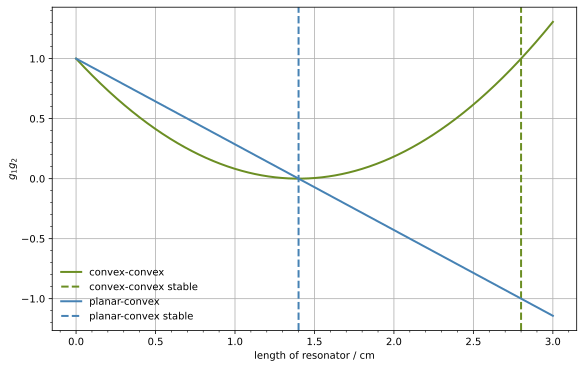

In [2]:
xx = np.linspace(0,3,1000)
R = 1.4

plt.plot(xx, (1-xx/R)**2, color='olivedrab', linewidth = 2, label = 'convex-convex')
plt.axvline(2*R, color='olivedrab', linestyle='--', linewidth=2, label = 'convex-convex stable')

plt.plot(xx, (1-xx/R), color='steelblue', linewidth = 2, label = 'planar-convex')
plt.axvline(R, color='steelblue', linestyle='--', linewidth=2, label = 'planar-convex stable')

plt.xlabel(r'length of resonator / cm')
plt.ylabel(r'$g_1g_2$')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

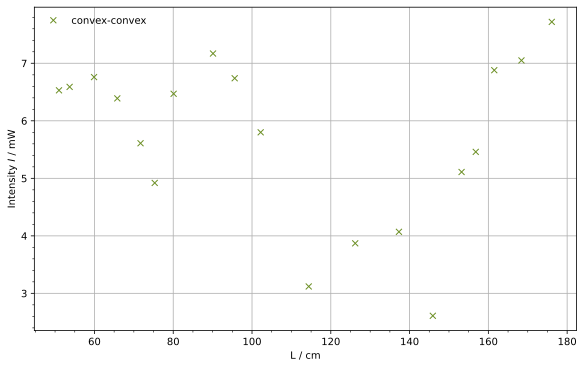

In [3]:
x, I = np.genfromtxt('data/konkavstab.txt', unpack=True)

plt.plot(x+1.6, I, color='olivedrab', marker='x' , linestyle='None', label = 'convex-convex')

# x, I = np.genfromtxt('data/planstab.txt', unpack=True, skip_header=1)

# plt.plot(x+1.6, I, color='steelblue', marker='x', linestyle='None', label = 'planar-convex')
'''
weiß nicht ob beide in einem plot besser, 3 messwerte in einem ist schon armselig
''' 

plt.xlabel(r'L / cm')
plt.ylabel(r'Intensity $I$ / mW')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

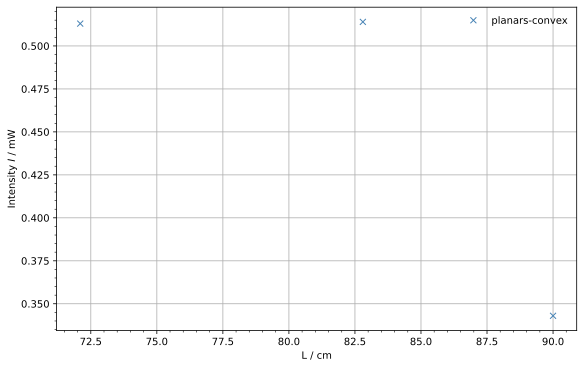

In [4]:
x, I = np.genfromtxt('data/planstab.txt', unpack=True)

plt.plot(x+1.6, I, color='steelblue', marker='x', linestyle='None', label = 'planars-convex')

plt.xlabel(r'L / cm')
plt.ylabel(r'Intensity $I$ / mW')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

### Polarisation

I_0 = 4.140+/-0.032
alpha = 1.133+/-0.004
c = -0.003+/-0.018


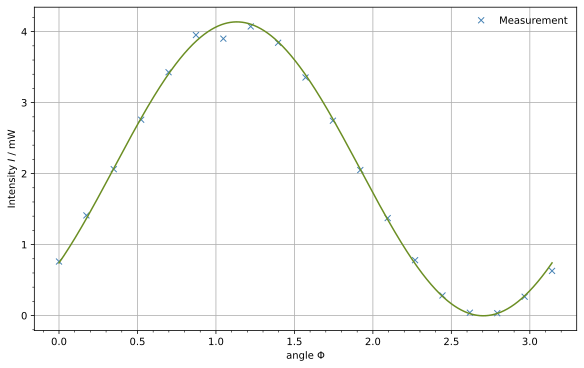

In [5]:
a, I = np.genfromtxt('data/polarisation.txt', unpack=True)

plt.plot(a*np.pi/180, I, color='steelblue', marker='x', linestyle='None', label = 'Measurement')

def cos(phi, I, alpha, c):
    return I*np.cos(phi-alpha)**2+c

mask = a != 60
a = a[mask]
I =I[mask]

par, cov = fit(cos, a*np.pi/180, I)
err = np.sqrt(np.diag(cov))

upar = uar(par, err)

print(f'I_0 =', upar[0])
print(f'alpha =', upar[1])
print(f'c =', upar[2])

xx = np.linspace(0, np.pi, 1000 )
plt.plot(xx, cos(xx, *noms(upar)), color='olivedrab')

plt.xlabel(r'angle $\Phi$')
plt.ylabel(r'Intensity $I$ / mW')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

### TEM (FIT FÜR LETZTE BEIDE FEHLT)


I_0 = 39.860+/-0.877
b = 0.149+/-0.306
m = 10.075+/-0.076
s = -3.082+/-0.085


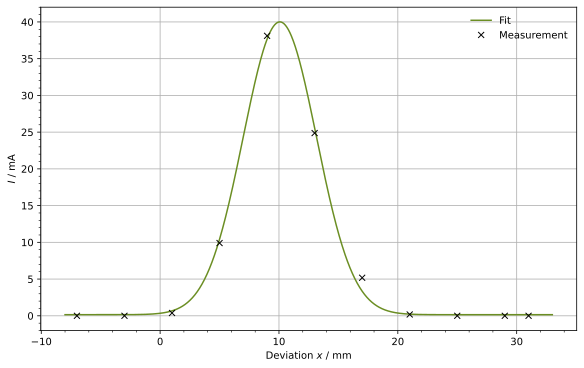

In [6]:
x,I = np.genfromtxt('data/TEM00.txt', unpack=True)#, skip_header=1)


def gauss(x, I, b, m, s):
    return I * np.e**(- (x - m)**2 / (2 * s**2)) + b

par, cov = fit(gauss, x, I**2)#, p0=[1.0, 0.0, 0.0, 0.1])
err = np.sqrt(np.diag(cov))

upar = uar(par, err)

print(f'I_0 = {upar[0]:.3f}')
print(f'b = {upar[1]:.3f}')
print(f'm = {upar[2]:.3f}')
print(f's = {upar[3]:.3f}')

xx = np.linspace(-8,33, 1000)
plt.plot(xx, gauss(xx, *noms(upar)), color='olivedrab', label = 'Fit')

plt.plot(x, I**2, 'kx', linestyle='None', label = 'Measurement')

plt.xlabel(r'Deviation $x$ / mm')
plt.ylabel(r'$I$ / mA')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

I_0 = 0.025+/-45549486.412
b = 0.105+/-0.065
m = 4.271+/-267241220.019
s = 0.787+/-27492501.760
l = 0.069+/-3512386363.243


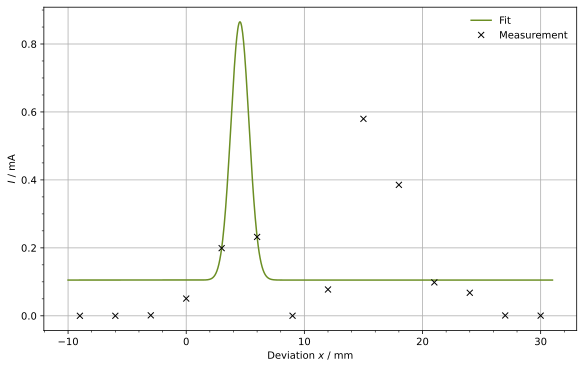

In [7]:
x,I = np.genfromtxt('data/TEM01.txt', unpack=True)#, skip_header=1)


def gauss(x, I, b, m, s, l):
    return I * ((x-l)/s)**2 * np.e**(- (x - m)**2 / (2 * s**2)) + b

par, cov = fit(gauss, x, I**2) #, p0=[.09, 0.0, -.45,0.1, 0.1])
err = np.sqrt(np.diag(cov))

upar = uar(par, err)

print(f'I_0 = {upar[0]:.3f}')
print(f'b = {upar[1]:.3f}')
print(f'm = {upar[2]:.3f}')
print(f's = {upar[3]:.3f}')
print(f'l = {upar[4]:.3f}')

xx = np.linspace(-10,31, 1000)
plt.plot(xx, gauss(xx, *noms(upar)), color='olivedrab', label = 'Fit')

plt.plot(x, I**2, 'kx', linestyle='None', label = 'Measurement')

plt.xlabel(r'Deviation $x$ / mm')
plt.ylabel(r'$I$ / mA')
plt.legend()
plt.grid(True)
plt.show()
plt.close()



[-0.00782908367158285+/-463178434554391.75
 0.020819842451575213+/-0.01573971402071089
 0.7553455573386305+/-1.098699455926132e+16
 0.2928617177817816+/-1563393734708803.8
 1.3535853069063848+/-1.4595447184600576e+16]


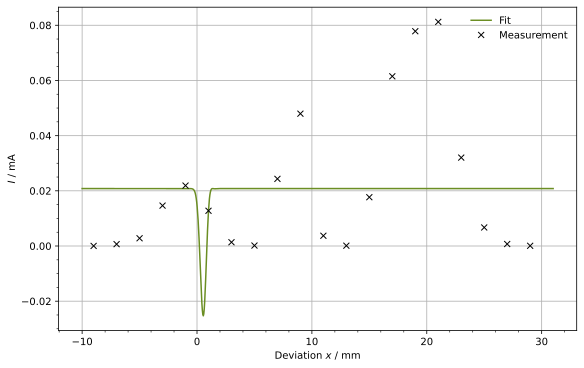

In [8]:
x,I = np.genfromtxt('data/TEM02.txt', unpack=True)#, skip_header=1)


def gauss(x, a, b, m, s, l):
    return a * ((x-l)/s)**2 * np.e**(- (x - m)**2 / (2 * s**2)) + b

par, cov = fit(gauss, x, I**2) #, p0=[.09, 0.0, -.45,0.1, 0.1])
err = np.sqrt(np.diag(cov))

upar = uar(par, err)

print(upar)

xx = np.linspace(-10,31, 1000)
plt.plot(xx, gauss(xx, *noms(upar)), color='olivedrab', label = 'Fit')

plt.plot(x, I**2, 'kx', linestyle='None', label = 'Measurement')

plt.xlabel(r'Deviation $x$ / mm')
plt.ylabel(r'$I$ / mA')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

### Wellenlänge

Peak 5: λ = (3.59+/-0.00)e-07 m
Peak 4: λ = (3.56+/-0.00)e-07 m
Peak 3: λ = (3.55+/-0.00)e-07 m
Peak 2: λ = (3.62+/-0.00)e-07 m
Peak 1: λ = (3.74+/-0.00)e-07 m
Peak 1: λ = (3.58+/-0.00)e-07 m
Peak 2: λ = (3.49+/-0.00)e-07 m
Peak 3: λ = (3.58+/-0.00)e-07 m
Peak 4: λ = (3.60+/-0.00)e-07 m
Peak 5: λ = (3.69+/-0.00)e-07 m
Mittelwert der Wellenlängen: (3.601+/-0.001)e-07 m


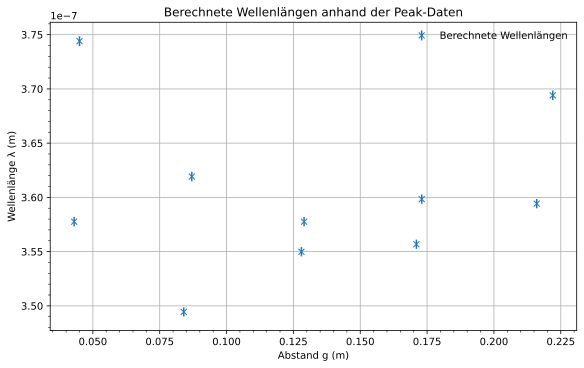

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy as unp

# Konstanten und Daten laden
d_cm = 83.2  # in cm
g_mm = 1/100  # in mm

# Umrechnen in Meter
d = d_cm / 100  # cm to m
g = (g_mm / 1000)**(-1)  # mm to m

# Neue Daten
data = np.array([
    [5, 21.6],
    [4, 17.1],
    [3, 12.8],
    [2, 8.7],
    [1, 4.5],
    [1, 4.3],
    [2, 8.4],
    [3, 12.9],
    [4, 17.3],
    [5, 22.2]
])

# Umrechnen der Abstände in Meter
peak_number, distances_cm = data[:, 0], data[:, 1]
distances = distances_cm / 100  # cm to m

# Unsicherheitswerte hinzufügen
ud = ufloat(d, 0.1 / 100)  # Unsicherheit ebenfalls in Meter umrechnen
ug = ufloat(g, 0.01 / 1000)  # Unsicherheit ebenfalls in Meter umrechnen

# Berechnung der Wellenlänge lambda
def lambda_calc(d, x, n, g):
    return (d * x) / (n * unp.sqrt(g**2 + x**2))

# Berechnen der Wellenlängen für die gegebenen Daten
ulambdas = lambda_calc(ud, distances, peak_number, ug)

# Ergebnisse anzeigen
for i, l in enumerate(ulambdas):
    print(f"Peak {int(peak_number[i])}: λ = {l:.2e} m")

# Mittelwert der Wellenlängen berechnen
nom_values = unp.nominal_values(ulambdas)
errors = unp.std_devs(ulambdas)

# Berechne den Mittelwert der Nominalwerte
mittelwert_nom = np.mean(nom_values)

# Berechne den Gesamtfehler durch quadratische Mittelung der Fehler
gesamtfehler = np.sqrt(np.sum(errors**2)) / len(errors)

# Mittelwert mit Unsicherheit
mittelwert_mit_unsicherheit = ufloat(mittelwert_nom, gesamtfehler)

# Mittelwert anzeigen
print(f"Mittelwert der Wellenlängen: {mittelwert_mit_unsicherheit:.3e} m")

# Daten visualisieren
plt.errorbar(distances, unp.nominal_values(ulambdas), yerr=unp.std_devs(ulambdas), fmt='x', label='Berechnete Wellenlängen')
plt.xlabel('Abstand g (m)')
plt.ylabel('Wellenlänge λ (m)')
plt.title('Berechnete Wellenlängen anhand der Peak-Daten')
plt.legend()
plt.grid(True)
plt.show()



Peak 4: λ = (4.618+/-0.006)e-07 m
Peak 3: λ = (4.576+/-0.005)e-07 m
Peak 2: λ = (4.618+/-0.006)e-07 m
Peak 1: λ = (4.493+/-0.005)e-07 m
Peak 1: λ = (4.493+/-0.005)e-07 m
Peak 2: λ = (4.451+/-0.005)e-07 m
Peak 3: λ = (4.465+/-0.005)e-07 m
Peak 4: λ = (4.534+/-0.005)e-07 m
Mittelwert der Wellenlängen: (4.531+/-0.002)e-07 m


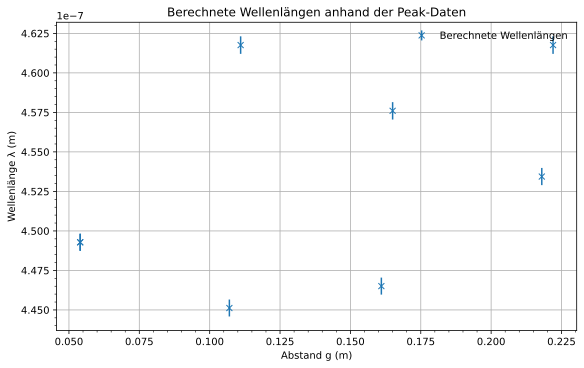

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy as unp

# Konstanten und Daten laden
d_cm = 83.2  # in cm
g_mm = 1/100  # in mm

# Umrechnen in Meter
d = d_cm / 100  # cm to m
g = (g_mm / 1000)**(-1)  # mm to m

# Neue Daten
data = np.array([
    [4, 22.2],
    [3, 16.5],
    [2, 11.1],
    [1, 5.4],
    [1, 5.4],
    [2, 10.7],
    [3, 16.1],
    [4, 21.8]
])

# Umrechnen der Abstände in Meter
peak_number, distances_cm = data[:, 0], data[:, 1]
distances = distances_cm / 100  # cm to m

# Unsicherheitswerte hinzufügen
ud = ufloat(d, 0.1 / 100)  # Unsicherheit ebenfalls in Meter umrechnen
ug = ufloat(g, 0.01 / 1000)  # Unsicherheit ebenfalls in Meter umrechnen

# Berechnung der Wellenlänge lambda
def lambda_calc(d, x, n, g):
    return (d * x) / (n * unp.sqrt(g**2 + x**2))

# Berechnen der Wellenlängen für die gegebenen Daten
ulambdas = lambda_calc(ud, distances, peak_number, ug)

# Ergebnisse anzeigen
for i, l in enumerate(ulambdas):
    print(f"Peak {int(peak_number[i])}: λ = {l:.3e} m")

    # Mittelwert der Wellenlängen berechnen
nom_values = unp.nominal_values(ulambdas)
errors = unp.std_devs(ulambdas)

# Berechne den Mittelwert der Nominalwerte
mittelwert_nom = np.mean(nom_values)

# Berechne den Gesamtfehler durch quadratische Mittelung der Fehler
gesamtfehler = np.sqrt(np.sum(errors**2)) / len(errors)

# Mittelwert mit Unsicherheit
mittelwert_mit_unsicherheit = ufloat(mittelwert_nom, gesamtfehler)

# Mittelwert anzeigen
print(f"Mittelwert der Wellenlängen: {mittelwert_mit_unsicherheit:.3e} m")

# Daten visualisieren
plt.errorbar(distances, unp.nominal_values(ulambdas), yerr=unp.std_devs(ulambdas), fmt='x', label='Berechnete Wellenlängen')
plt.xlabel('Abstand g (m)')
plt.ylabel('Wellenlänge λ (m)')
plt.title('Berechnete Wellenlängen anhand der Peak-Daten')
plt.legend()
plt.grid(True)
plt.show()



